# **A1.3 Regresión lineal múltiple**

**1.** Para comenzar, la siguiente celda importa la base de datos "*A1.3 NASA.csv*" utilizando la librería **pandas** y la función **read_csv( )**. La base de datos contiene observaciones sobre variables que afectan a los **perfiles aerodinámicos ideales ante distintas condiciones**. Las varibles observadas son "**frecuencia**","**ángulo**", "**longitud**","**velocidad**", "**espesor**" y "**presión**".

 Utilizando la función **.shape( )** se obtienen las dimensiones de la base de datos y con el comando **.head(15)** se imprime un resumen de los datos mostrando las primeras **15** filas.

In [6]:
import pandas as pd
df = pd.read_csv('A1.3 NASA.csv')
rows, cols = df.shape
print("Las dimensiones de la base de datos son de",rows,"filas x",cols,"columnas")
df.head(15)

Las dimensiones de la base de datos son de 1503 filas x 6 columnas


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


**2.** A continuación, se separa la base de datos en **datos de entrenamiento** y **datos de prueba**. El **70%** de los datos se usará para entrenar el modelo y el otro **30%** restante será usado para validar los resultados.

En la celda se importa la función **train_test_split( )** de la librería **sklearn.model_selection** con la cual se divide la base de datos con la proporción deseada y de manera **aleatoria** para evitar cualquier sesgo por el orden original de la base de datos. Se imprimen ambos sets de datos junto con sus dimensiones y con el comando **.shape( )** se verifica que la suma de ambos sets sea igual a la cantidad de observaciones del data frame completo (1503 observaciones).

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=23)
print("Training Set:")
print(train)
print("\nTesting Set:")
print(test)
total = train.shape[0] + test.shape[0]

print(f"Cantidad de observaciones: {total}")

Training Set:
      frecuencia  angulo  longitud  velocidad   espesor  presion
131          800     3.0    0.3048       39.6  0.004957  129.552
1488         250    15.6    0.1016       39.6  0.052849  124.644
891          630    15.4    0.0508       55.5  0.027193  129.330
1337        2000     3.3    0.1016       31.7  0.002514  131.642
28         12500     0.0    0.3048       55.5  0.002831  111.076
...          ...     ...       ...        ...       ...      ...
31           315     0.0    0.3048       39.6  0.003101  122.779
950          315    19.7    0.0508       39.6  0.036484  129.864
1064        3150     9.5    0.0254       71.3  0.004207  136.166
742         2000     0.0    0.0508       55.5  0.000762  131.456
595         6300     5.4    0.1524       31.7  0.005255  115.591

[1052 rows x 6 columns]

Testing Set:
      frecuencia  angulo  longitud  velocidad   espesor  presion
444          800     7.3    0.2286       31.7  0.013267  123.209
454          800     0.0    0.1524   

**3.** El siguiente paso es **entrenar el modelo de regresión lineal múltiple** para que las primeras 5 variables predigan la 6ta, que es "**presion**". La siguiente celda importa la función **LinearRegression ( )** de la librería **sklearn.linear_model** la cual se usa para generar el modelo.

Para preparar los datos, se aislan las primeras 5 variables en una matriz "**x**" y los datos de la "presion" se guardan en un vector "**y**" utilizando el comando **.iloc[ ]**. Posteriormente, se utiliza la función **LinearRegression( )** y el comando **.fit( )** para entrenar el modelo con los datos de las variables **x** y **y**.

Con el uso de la función **OLS( )** de la librería **statsmodels.api** y de los comandos **.coef_[ ]** y **.intercept_()** se imprime un resumen del modelo mostrando los 5 **coeficientes** y el **intercepto** del modelo así como los **p-values** de cada variable, la **R^2** del modelo, el **RSS**, el **F-statistic** del modelo y su **p-value**, etc.

Para un mejor análisis de cada variable, utilizando la función **OLS( )** y la librería **numpy**, se generan 5 modelos diferentes, uno sin cada una de las variables medidas. Se obtiene el **Reduced Sum of Squares (RSS)** de cada modelo y comparandolo con el RSS del modelo original y obteniendo el **F-statistic** de cada variable para determinar su **importancia** dentro del modelo.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

x_train = train.iloc[:,:-1]
y_train = train.iloc[:, -1]

model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficients:")
print("β1 =", model.coef_[0])
print("β2 =",model.coef_[1])
print("β3 =",model.coef_[2])
print("β4 =",model.coef_[3])
print("β5 =",model.coef_[4])
print("Intercept:")
print("β0 =", model.intercept_)

x_train_ols = train.iloc[:, :-1]
y_train_ols = train.iloc[:, -1]

x_train_ols = sm.add_constant(x_train_ols)
model_ols = sm.OLS(y_train_ols,x_train_ols)
result = model_ols.fit()
print("")
print(result.summary())
print("P-values:")
print(result.pvalues)
print("RSE:",result.scale ** 0.5)

residuals = result.resid
rss = np.sum(residuals ** 2)
print(f"\nComplete model RSS: {rss}")

rss_values = {}
f_values = {}

for col in x_train_ols[1:]:
  x_reduced = x_train_ols.drop(columns=[col])
  model_var = sm.OLS(y_train_ols,x_reduced).fit()
  rss_reduced = np.sum(model_var.resid ** 2)
  f_var = (rss_reduced - rss) / (rss / (1052 - 4 - 1))
  rss_values[col] = rss_reduced
  f_values[col] = f_var
  print(f"RSS without {col}: {rss_reduced}")
  print(f"F without {col}: {f_var}")

f_df = pd.DataFrame(list(f_values.items()), columns=["Variable Remmoved", "F"])
print("\nF Comparison")
print(f_df)

Coefficients:
β1 = -0.0012978038960980028
β2 = -0.3989987260235478
β3 = -35.70102416491731
β4 = 0.0993691020870115
β5 = -143.04868892987162
Intercept:
β0 = 132.73202654457472

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     216.5
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          1.48e-158
Time:                        06:36:55   Log-Likelihood:                -3153.0
No. Observations:                1052   AIC:                             6318.
Df Residuals:                    1046   BIC:                             6348.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

**4.** Considerando el **p-value** del **F-statistic**, el cual tiene un valor de **1.48e-158** y por lo tanto es mucho menor a **0.05**, se sabe que sí existe **por lo menos una variable significativa en el modelo**.

Debido al **p-value** calculado para cada una de las variables, **todas tienen una asociación lineal significativa** con la presión debido a que sus **p-values** son mucho **menores a 0.05**.

Una vez realizados modelos de prueba en los cuales a cada uno le falta una de las 5 variables medidas, y después de haber calculado los **F-statistic de cada variable** considerando el RSS del modelo sin esta varible y el RSS del modelo original, la **variable más importante** para el modelo es la **frecuencia**, ya que sin esta variable en el modelo, el error aumenta más que con la ausencia de cualquier otra de las variables siendo su **F-statistic = 664.351**.

**5.** En la siguiente celda se utilizan los **datos de prueba** para validar el modelo. Para preparar los datos de prueba se separan las variables de entrada en una matriz **X** y la variable de salida "**presion**" en un vector **Y**. Utilizando el comando **.predict( )** y dando las variables de entrada como parámetro se obtiene un vector con las **predicciones del modelo** ante los nuevos datos proporcionados.

Posteriormente, se calcula el **residual standard error (RSE)** y la **R^2** del modelo para los **datos de entrenamiento** y para los **datos de prueba**. Para esto se importan las funciones **r2_score** y **mean_squared_error** de la librería **sklearn.metrics**. y se utilizan las funciones **.scale** y **.rsquared** de la librería **statsmodels.api**.

Una vez obtenidas las métricas para cada set de datos, se compara el rendimiento del modelo para cada uno.

In [9]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"RSE en entrenamiento: {result.scale ** 0.5} ")
print(f"R² en entrenamiento: {result.rsquared}")

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

y_pred = model.predict(x_test)

rse_test = np.sqrt(mean_squared_error(y_test, y_pred))

r2_test = r2_score(y_test,y_pred)
print(f"RSE en test: {rse_test}")
print(f"R² en test: {r2_test}")

RSE en entrenamiento: 4.860277609749716 
R² en entrenamiento: 0.5085283628341204
RSE en test: 4.70208479170151
R² en test: 0.5286498626950422


Una observación que vale la pena mencionar es que para este modelo en específico la comparación del **RSE** y la **R^2** entre ambos sets de datos es **anormal**. Generalmente, utilizando los datos de entrenamiento, el **RSE es menor** (hay menos error) y la **R^2 es mayor** (mejor ajuste a los datos), sin embargo, el modelo resultante en este proyecto tiene un **mejor ajuste** (mayor R^2) y **menor error** (menor RSE) al utilizarse con los datos de prueba que con los datos de entrenamiento.

Esto es un **suceso aleatorio** el cual sucede debido a **fluctuaciones aleatorias** en los datos y en la manera de separarlos pero que, en este caso, no invalida el modelo.

**6.** Finalmente, para **visualizar los resultados**, se genera una **gráfica de dispersión** en la cual se comparan los **datos reales** de Y ("presion") en el eje x y los **valores estimados** con el modelode Y en el eje Y.

En la gráfica se agrega una **línea recta** con una pendiente de 1 (45°) a la cual se ajustarían los puntos si el modelo fuese perfecto ya que ambos valores reales y estimados serían iguales. De esta manera se puede observar visualmente la **calidad del modelo** al asemejarse más o menos a esta línea.

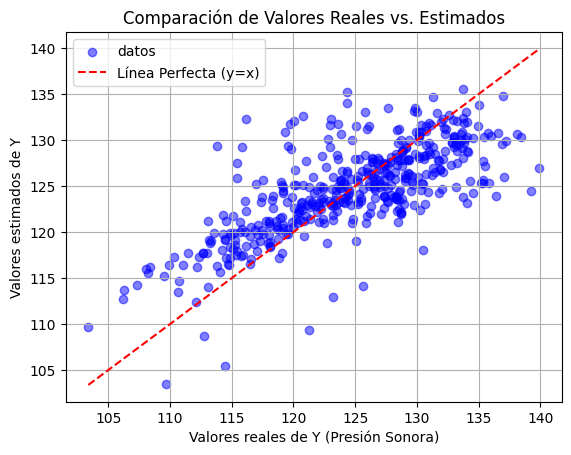

In [10]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue',alpha=0.5, label="datos")
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val],color = 'red',linestyle='--', label="Línea Perfecta (y=x)")
plt.xlabel("Valores reales de Y (Presión Sonora)")
plt.ylabel("Valores estimados de Y")
plt.title("Comparación de Valores Reales vs. Estimados")
plt.legend()
plt.grid(True)

plt.show()

Acerca de los resultados obtenidos, se puede observar una **tendencia clara** entre los puntos y la línea de lo que sería un modelo perfecto por lo cual se puede afirmar que el modelo captura correctamente la relación entre las variables y tiene un **buen desempeño** en general.

Aún así, el modelo cuenta con bastantes **áreas de oportunidad** ya que existe cierta **dispersión** entre los puntos y la línea del modelo perfecto. En valores bajos de Y real el modelo sobreestima algunos valores y en valores más altos de Y real el modelos subestima algunos valores lo cual puede indicar la existencia de **patrones no lineales** en la relación con algunas variables.

Pueden realizarse ajustes y mejoras al modelo, sin embargo, ya cuenta con una **calidad aceptable**.

### **Referencias**

NASA. (1989, julio). Airfoil Self-Noise and prediction. ntrs.nasa.gov. Recuperado 29 de enero de 2025, de https://ntrs.nasa.gov/api/citations/19890016302/downloads/19890016302.pdf

UC Irvine Machine Learning Repository. (2014, 3 marzo). UCI Machine Learning Repository. archive.ics.uci.edu. Recuperado 29 de enero de 2025, de https://archive.ics.uci.edu/dataset/291/airfoil+self+noise

